# Greece Tourism - Data Insights

In [1]:
#Packages needed to load before starting Data Cleaning process

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chardet

# since I am using a file in my local drive, I used this expression to open according the enconding done

file_path = r"C:\Users\Juan.Cardenas\Documents\Python Scripts\EDA project\travel_tourism_dataset.csv"
# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Read the CSV with the detected encoding
df = pd.read_csv(file_path, encoding=encoding)

df.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel
0,55,1,20111,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13
1,288,5,29681,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04
2,291,7,24950,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25
3,131,19,18676,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28
4,281,28,18899,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21


This report presents a comprehensive analysis of travel information in Greece between 2020 and 2023. The dataset encompasses a variety of key details about each trip, providing valuable insights into travel patterns, demographics, and associated costs. The columns in the dataset include:

Trip Number: Unique identifier for each trip.
Duration: Length of each trip in days.
Cost of Travel (Entire Trip): Total expenditure for the entire trip.
Mode of Travel: Means of transportation used (e.g., car, plane, boat).
Stay: Type of accommodation used.
First Name: First name of the traveler.
Last Name: Last name of the traveler.
Date of Birth: Date of birth of the traveler.
Address: Residential address of the traveler.
Age: Age of the traveler.
Sex: Gender of the traveler.
Nationality: Nationality of the traveler.
Date of Travel: Date on which the trip commenced.
Our objective is to derive actionable insights from this dataset to aid decision-making for managers, CEOs, CFOs, and other stakeholders. The analyses will cover trends in travel costs, popular modes of travel, demographic patterns, and seasonal variations in travel behavior. By examining these aspects, we aim to provide a clear understanding of the travel dynamics within Greece during the specified period.

## Place of Origin of Torusits

In [2]:
origin = df.groupby('Nationality').size()
total_tourist = origin.sum()
tourist_percentage = (origin/total_tourist)*100

nationality_summary = pd.DataFrame({
    'Number of Tourists': origin,
    'Percentage of Tourists': tourist_percentage
})
nationality_summary.sort_values(by='Number of Tourists', ascending=False, inplace=True)
nationality_summary

,Number of Tourists,Percentage of Tourists
Nationality,,
Korea,31,1.033333
Lebanon,24,0.800000
Congo,23,0.766667
Gambia,23,0.766667
Lao People's Democratic Republic,23,0.766667
...,...,...
Albania,6,0.200000
Tunisia,6,0.200000
Gibraltar,5,0.166667


The analysis of tourist origins reveals a diverse mix of nationalities among the 300 tourists who visited Greece between 2020 and 2023.
From this data, it is evident that no single nationality significantly dominates the tourism landscape in Greece. The highest number of tourists from one country is from Korea, which only accounts for 1.03% of the total tourist population. This indicates a highly diversified tourist base, with no particular nationality having a substantial impact on the overall tourism industry.

This diversity suggests that tourism marketing and services in Greece should continue to cater to a wide range of international visitors rather than focusing on any single nationality. The spread of tourists across many countries can be seen as a strength, providing resilience against fluctuations in visitor numbers from any one country due to economic or geopolitical changes.


## Gender Distribution of Tourists

In [3]:
gender = df.groupby('Sex').size()
gender_total = gender.sum()
gender_percentage = (gender/gender_total)*100

gender_summary = pd.DataFrame({
    'Number of Individuals': gender,
    'Percentage of Individuals': gender_percentage
})
gender_summary

,Number of Individuals,Percentage of Individuals
Sex,,
Female,735,24.500000
Male,775,25.833333
Non-Binary,739,24.633333
Transgender,751,25.033333


Insight
The data indicates a fairly balanced distribution of tourists across different gender identities, with each category representing approximately one-quarter of the total tourist population. Specifically:

Males constitute the largest group at 25.83%.
Transgender individuals follow closely at 25.03%.
Non-Binary individuals represent 24.63%.
Females account for 24.5%.
This near-equal distribution suggests that Greece is an inclusive and welcoming destination for tourists of all gender identities. The close percentages across all groups highlight the importance of maintaining and promoting gender-inclusive practices within the tourism industry.

Recommendations
Inclusive Marketing: Tourism marketing campaigns should ensure they are inclusive of all gender identities, reflecting the diverse tourist base.

Staff Training: Tourism and hospitality staff should receive training on gender inclusivity and sensitivity to provide a welcoming environment for all visitors.

Facilities and Services: Ensure that facilities and services are gender-inclusive, such as gender-neutral restrooms and inclusive tour packages.

By continuing to support and enhance gender inclusivity, Greece can maintain and possibly increase its attractiveness as a tourist destination for individuals of all gender identities.

## Mode of Travel for Tourists

In [4]:
transport = df.groupby('Mode of Travel').size()
transport

Mode of Travel
Bus         516
Car         551
Cruise      501
Flight      461
Roadtrip    473
Train       498
dtype: int64

The data reveals a diverse range of transportation methods used by tourists, with each mode showing significant usage. Specifically:

Car travel is the most popular mode, with 551 instances, indicating that many tourists prefer the flexibility and convenience of driving.
Bus travel follows closely behind with 516 instances, showing the popularity of organized group travel.
Cruises are also a significant mode of travel, with 501 instances, reflecting Greece's appeal as a cruise destination.
Train travel (498 instances) and road trips (473 instances) are also commonly used, highlighting the diversity in tourists' preferences for exploring Greece.
Flights are the least utilized mode among the listed options, with 461 instances, but still represent a substantial portion of travel.

Recommendations
Enhance Road Infrastructure: Given the high number of tourists traveling by car and bus, continued investment in road infrastructure can improve safety and convenience.

Support Cruise Tourism: With cruises being a significant mode of travel, enhancing port facilities and creating attractive shore excursions can further boost this segment.

Promote Diverse Travel Packages: Offer and market travel packages that include a mix of transportation modes, such as combining flights with road trips or cruises with train journeys.

Sustainable Travel Options: Encourage and develop sustainable travel options, such as eco-friendly buses and trains, to cater to environmentally conscious tourists.

By recognizing and catering to the varied travel preferences of tourists, Greece can enhance the overall visitor experience and potentially attract more visitors.

## Preferred Accomodations for Torusits

In [5]:
stay = df.groupby('Stay').size()
stay

Stay
Airbnb     786
Hotel      724
Other      787
Resorts    703
dtype: int64

The data demonstrates a fairly balanced distribution among various types of accommodations, indicating that tourists have diverse preferences:

Other accommodations (787 instances) slightly edge out other categories, suggesting a wide range of alternative lodging options being utilized. This could include hostels, guest houses, bed-and-breakfasts, and short-term rentals not listed under Airbnb.
Airbnb follows closely with 786 instances, highlighting the popularity of private rentals and the desire for a more personalized, home-like experience.
Hotels are also a major choice, with 724 instances, indicating that traditional accommodation options remain strong due to their convenience, services, and amenities.
Resorts (703 instances) attract a significant number of tourists, reflecting the appeal of all-inclusive stays and the luxury market.

Recommendations

Support Diverse Accommodation Options: Encourage and support a variety of accommodation types to cater to different preferences and budgets, ensuring that all tourist needs are met.

Regulate and Promote Airbnb and Other Rentals: Implement regulations to ensure safety and quality standards for Airbnb and other rental properties, while promoting them as viable options for tourists.

Enhance Hotel and Resort Offerings: Continue to invest in the quality and variety of hotel and resort offerings, including modern amenities, exceptional services, and unique experiences to stay competitive.

Market Alternative Accommodations: Promote lesser-known accommodation options through targeted marketing campaigns, showcasing the unique experiences they can offer to tourists.

By acknowledging the diverse accommodation preferences, Greece can enhance its tourism strategy to provide a range of high-quality lodging options, ultimately improving the visitor experience and encouraging repeat visits.

In [9]:
age_spender = df.groupby('Age').agg({'Cost of Travel(Entire Trip)': 'mean'})
age_spender['Cost of Travel(Entire Trip)'] = age_spender['Cost of Travel(Entire Trip)'] / 1000

mean_cost_of_travel = df['Cost of Travel(Entire Trip)'].mean()
print('Cost of Travel Mean:',mean_cost_of_travel)
age_spender.rename(columns={'Cost of Travel(Entire Trip)': 'Travel Cost (x1000)'}, inplace=True)

age_spender.reset_index(inplace=True)
age = df.groupby('Age').size()
age_summary = pd.DataFrame({
    'Number of Individuals': age
})

age_summary.reset_index(inplace=True)

age_summary.sort_values(by='Age', ascending=False, inplace=True)

age_spender = pd.merge(age_spender, age_summary, on='Age')

age_spender.sort_values(by='Travel Cost (x1000)',ascending=False,inplace=True)

age_spender.head(10)

Cost of Travel Mean: 17741.67033333333


,Age,Travel Cost (x1000),Number of Individuals
20,38,21.139574,47
26,44,21.073905,42
21,39,20.846214,56
31,49,19.894920,50
11,29,19.761379,58
23,41,19.616205,44
0,18,19.613379,58
19,37,19.534234,47
43,61,18.929704,54
7,25,18.929237,38


Cost of Travel Mean: 17741.67033333333


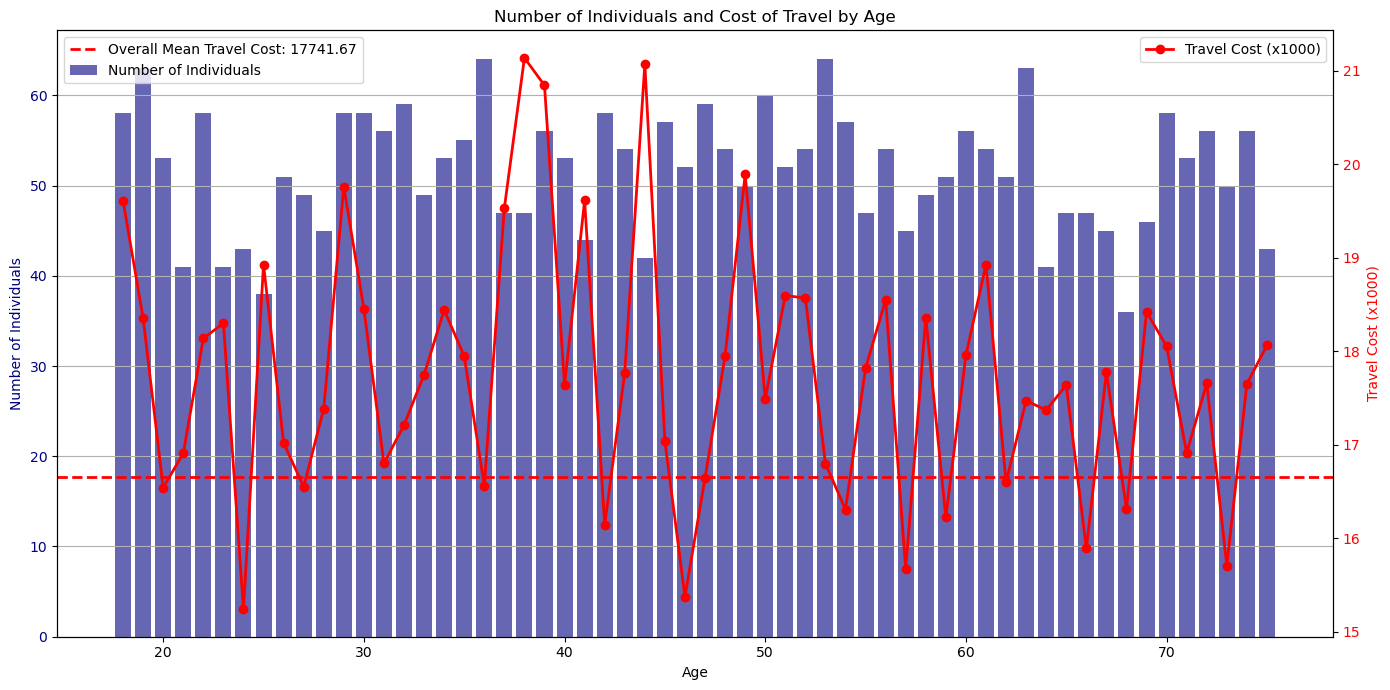

In [21]:
age_purchase_power = df.groupby('Age').agg({'Cost of Travel(Entire Trip)': 'mean'})
age_purchase_power['Cost of Travel(Entire Trip)'] = age_purchase_power['Cost of Travel(Entire Trip)'] / 1000

mean_cost_of_travel = df['Cost of Travel(Entire Trip)'].mean()
print('Cost of Travel Mean:',mean_cost_of_travel)
age_purchase_power.rename(columns={'Cost of Travel(Entire Trip)': 'Travel Cost (x1000)'}, inplace=True)

age_purchase_power.reset_index(inplace=True)

age_purchase_power.sort_values(by='Age',ascending=False,inplace=True)

merged_df = pd.merge(age_summary,age_purchase_power, on='Age')


merged_df = pd.merge(age_summary, age_purchase_power, on='Age')


fig, ax1 = plt.subplots(figsize=(14, 7))


ax1.bar(merged_df['Age'], merged_df['Number of Individuals'], color='navy', alpha=0.6, label='Number of Individuals')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Individuals', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')


ax2 = ax1.twinx()
ax2.plot(merged_df['Age'], merged_df['Travel Cost (x1000)'], color='r', marker='o', linestyle='-', linewidth=2, label='Travel Cost (x1000)')
ax2.set_ylabel('Travel Cost (x1000)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Number of Individuals and Cost of Travel by Age')
ax1.grid(axis='y')


ax1.axhline(y=mean_cost_of_travel / 1000, color='r', linestyle='--', linewidth=2, label=f'Overall Mean Travel Cost: {mean_cost_of_travel:.2f}')



fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

Under 30 Group:

These travelers, being the youngest, exhibit adventurous spending patterns likely focused on unique and memorable experiences. They may prefer active travel adventures or trendy destinations that are popular on social media.

Between 30 and 50 Group:

This is the largest group in terms of high spenders, indicating a significant phase of life where travel might be a priority. These individuals likely have more financial stability and prefer a blend of adventure, luxury, and sometimes family-oriented travels.

Over 50 Group:

The group over 50, represented here by those aged 61, tends to spend on comfort and convenience, possibly seeking more relaxed or health-conscious travel options that provide comfort without compromising on quality.

Strategic Implications:

Marketing Focus:

For the under 30 group, emphasize trendsetting destinations and Instagrammable spots.
For the 30 to 50 group, market a mix of luxury, cultural enrichment, and family packages that cater to both personal and professional needs.

For the over 50 group, focus on health, accessibility, and leisure travel offers that appeal to seniors looking for comfort and ease.

Product Development:

Develop products tailored to each group's unique travel motivations and preferences. For example, wellness retreats for the over 50s, adventure sports, or tech-enhanced travel experiences for the under 30s.

Service Customization:

Adjust services to meet the expectations of each age bracket, ensuring that marketing messages resonate with the target demographic's lifestyle and travel aspirations.

By understanding and segmenting these age groups according to their specific needs and spending behaviors, stakeholders can more effectively target their offerings, enhancing both customer satisfaction and business profitability.

## Mode of Travel

In [22]:
top5_age = df[df['Age'].isin([38,44,39,49,29,41,18,37,61,25])]

grouped_counts = top5_age.groupby(['Age', 'Mode of Travel']).size().reset_index(name='Count')


idx = grouped_counts.groupby('Age')['Count'].idxmax()
most_common_travel_mode = grouped_counts.loc[idx]


print(most_common_travel_mode)

    Age Mode of Travel  Count
2    18         Cruise     14
10   25       Roadtrip      9
16   29       Roadtrip     17
18   37            Bus     11
25   38            Car     14
32   39         Cruise     12
37   41            Car     12
44   44         Cruise     12
51   49         Flight     13
54   61            Bus     10


The preferences for modes of travel among the top spending age groups have been categorized into three segments: those under 30, those between 30 and 50, and those over 50. Here's a concise overview based on the provided data:

Under 30:

Age 18: Prefers Cruises, indicating a taste for inclusive, possibly international travel experiences.

Age 25 and 29: Favor Roadtrips, reflecting a desire for adventurous, flexible, and autonomous travel.

Between 30 and 50:

Age 37, 38, 39, 41, 44, and 49:

Bus and Car: Ages 37 and 38 prefer buses and cars, respectively, emphasizing convenience, group or family travel, and flexibility.

Cruises: Ages 39 and 44 prefer cruises, highlighting a preference for luxurious, comprehensive travel options.

Flight: Age 49 opts for flights, indicating a preference for efficiency and possibly business-related travel.

Over 50:

Age 61: Prefers Bus travel, which may suggest comfort and accessibility are priorities, possibly reflecting a preference for organized, relaxed travel settings.

Strategic Implications:

Under 30: Target marketing and product offerings towards inclusive and autonomous travel experiences like cruises and roadtrips.
Between 30 and 50: Diversify travel options to cater to both adventure-seekers (roadtrips) and those seeking luxury or 
efficiency (cruises and flights).

Over 50: Focus on accessibility and comfort, ensuring travel options like bus tours meet the need for convenience and ease of travel.

By understanding these preferences, the tourism industry can better tailor their offerings to meet the specific desires of different age segments, enhancing satisfaction and potentially boosting tourism revenues.

## Accommodation Preferences

In [23]:
grouped_counts = top5_age.groupby(['Age', 'Stay']).size().reset_index(name='Count')


idx = grouped_counts.groupby('Age')['Count'].idxmax()
most_common_stay = grouped_counts.loc[idx]


print(most_common_stay)

    Age     Stay  Count
0    18   Airbnb     17
5    25    Hotel     14
8    29   Airbnb     20
12   37   Airbnb     16
19   38  Resorts     15
20   39   Airbnb     18
24   41   Airbnb     12
30   44    Other     14
32   49   Airbnb     15
36   61   Airbnb     16


The accommodation preferences among the top spending age groups have been categorized into three segments: those under 30, those between 30 and 50, and those over 50. Here’s a concise grouping based on the provided data:

Under 30:

Age 18: Prefers Airbnb, indicating a desire for more relaxed and flexible lodging options.

Age 25: Chooses Hotels, showing a preference for traditional and possibly more service-rich accommodations.

Age 29: Also favors Airbnb, suggesting an affinity for personalized and possibly more budget-friendly accommodation choices.

Between 30 and 50:

Ages 37, 39, 41, 44, and 49:

Airbnb: Dominates the preferences for Ages 37, 39, 41, and 49, highlighting a consistent choice for home-like, customizable lodging.

Resorts: Age 38 shows a preference for resorts, aligning with a desire for more luxurious and comprehensive amenities.

Other: Age 44 opts for "Other" types of accommodations, which could include unique or niche options not covered by more standard categories.

Over 50:

Age 61: Prefers Airbnb, suggesting even in this older category, there is a significant appreciation for accommodations that offer a blend of comfort and a home-away-from-home experience.

Strategic Implications:

Under 30 Group:

Focus on promoting Airbnb and boutique hotels that align with young travelers' desires for authenticity and flexibility.
Hotels targeting this age group should emphasize modern amenities, technological conveniences, and vibrant social environments.

Between 30 and 50 Group:

Highlight Airbnb for its appeal across multiple age brackets within this range, particularly for family or group travels that require larger spaces and home-like facilities.

Resorts and unique lodging options should be marketed to those in their late 30s and early 40s, emphasizing luxury, relaxation, and all-inclusive packages.

Over 50 Group:

For those over 50, Airbnb's appeal suggests that comfort, privacy, and the feeling of living locally are significant. Marketing efforts should focus on safety, accessibility, and ease of use to attract this demographic.
Understanding these accommodation preferences allows the tourism industry to tailor their offerings more effectively, ensuring that they meet the specific desires and expectations of different age groups, enhancing overall satisfaction and potentially increasing repeat visits.

## Number of Tourists vs Average Travel Cost by Quarter

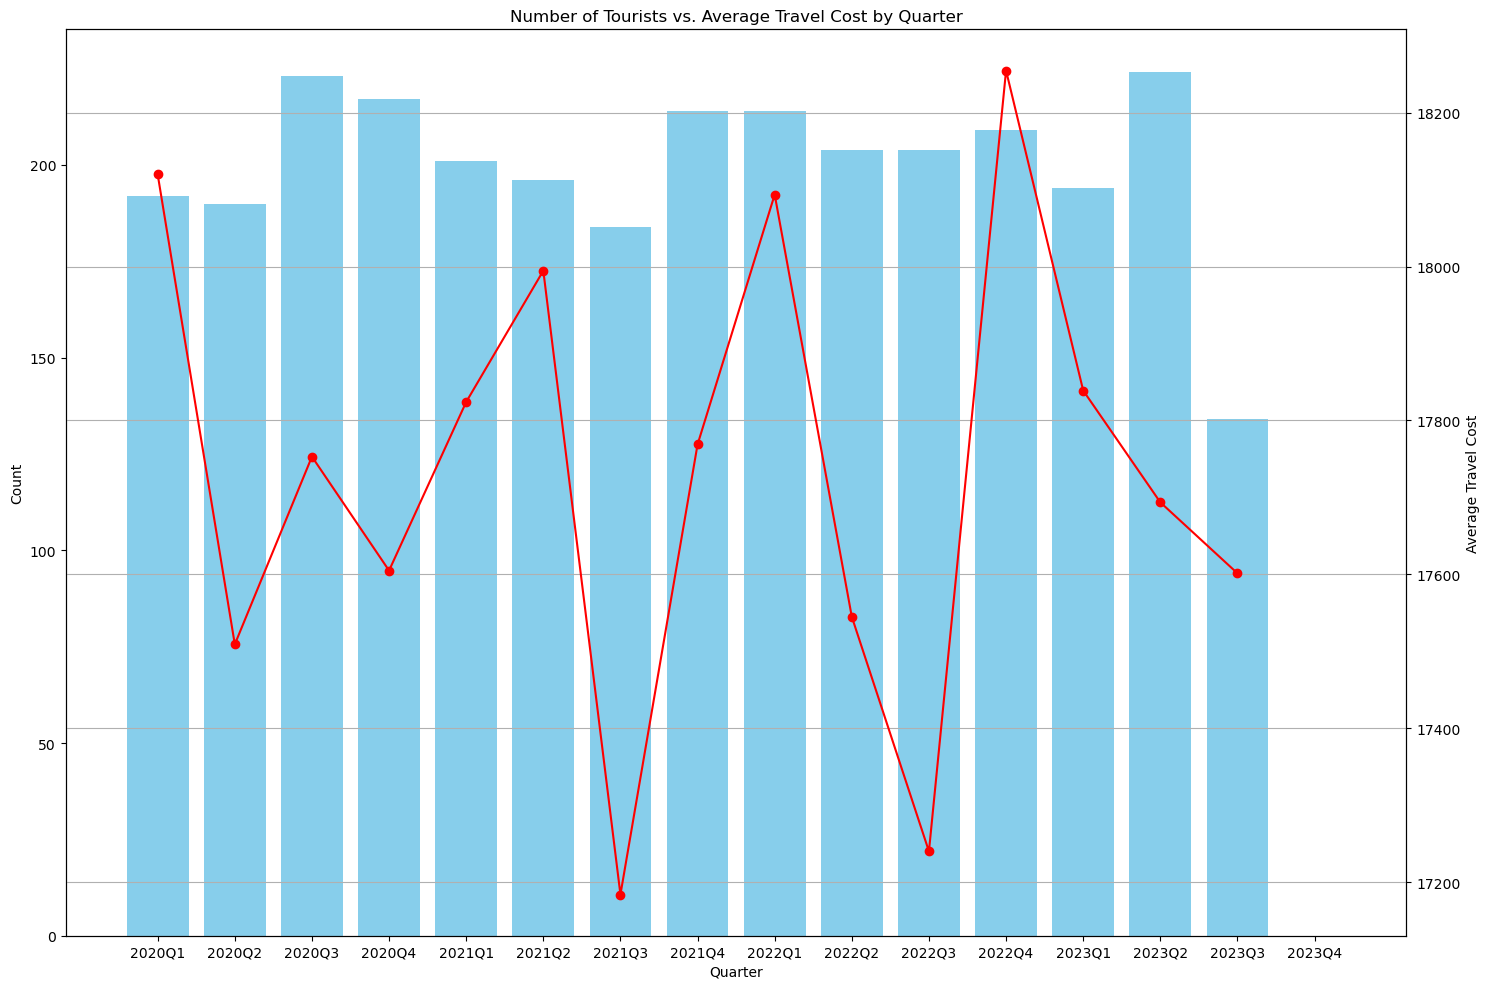

In [28]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Date of Travel']

df['Quarter'] = df['Date of Travel'].dt.to_period('Q')

year_range = range(2020, 2024)
quarter_counts = {}
quarter_avg_costs = {}

# Iterate through each year and quarter
for year in year_range:
    for quarter in [f"{year}Q1", f"{year}Q2", f"{year}Q3", f"{year}Q4"]:
        filtered_df = df[df['Quarter'] == quarter]
        quarter_count = filtered_df.shape[0]
        quarter_counts[quarter] = quarter_count
        
        avg_cost = filtered_df['Cost of Travel(Entire Trip)'].mean()
        quarter_avg_costs[quarter] = avg_cost

fig, ax1 = plt.subplots(figsize=(15, 10))


ax1.bar(quarter_counts.keys(), quarter_counts.values(), color='skyblue')
ax1.set_title('Number of Tourists vs. Average Travel Cost by Quarter')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Count')


ax2 = ax1.twinx()
ax2.plot(quarter_avg_costs.keys(), quarter_avg_costs.values(), marker='o', color='red', linestyle='-')
#ax2.set_title('Average Cost of Travel per Quarter')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Average Travel Cost')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Impact of External Factors:

The dramatic drop in tourist numbers in 2020Q2 aligns with the global impact of the COVID-19 pandemic, highlighting how external factors can drastically influence travel trends.

The recovery pattern from late 2020 through 2021 suggests a resilience and gradual return to travel as restrictions eased and confidence in travel restored.

Seasonal Fluctuations:

The peaks in tourist numbers, particularly in 2021Q4 and 2022Q3, may correspond to traditional travel seasons, indicating periods of higher tourist activity, possibly aligned with holidays and favorable weather conditions.

Cost vs. Count Relationship:

The graph illustrates that higher tourist numbers do not always correlate with higher average travel costs. For example, high tourist numbers in 2022Q3 coincide with lower average costs, suggesting that more tourists might be opting for budget-friendly 
travel options during peak seasons.

Strategic Recommendations:

Flexible Pricing Strategies:

Implement dynamic pricing strategies to balance occupancy and revenue, especially during peak seasons where higher tourist numbers coincide with lower average costs.

Targeted Marketing:

Focus marketing efforts during quarters with traditionally lower tourist numbers to boost visits during off-peak times, potentially through special promotions and discounts.

Enhance Peak Season Offerings:

During peak tourist periods, enhance offerings and experiences to cater to the increased demand, ensuring high levels of satisfaction and value for money.

Monitor External Influences:

Stay vigilant about external factors such as global health issues, economic conditions, and travel regulations, and adapt strategies accordingly to maintain a steady influx of tourists.

This analysis provides a comprehensive understanding of how tourist numbers and travel costs vary by quarter, helping stakeholders make informed decisions to optimize their operations and marketing strategies throughout the year.

## Correlation Heatmap

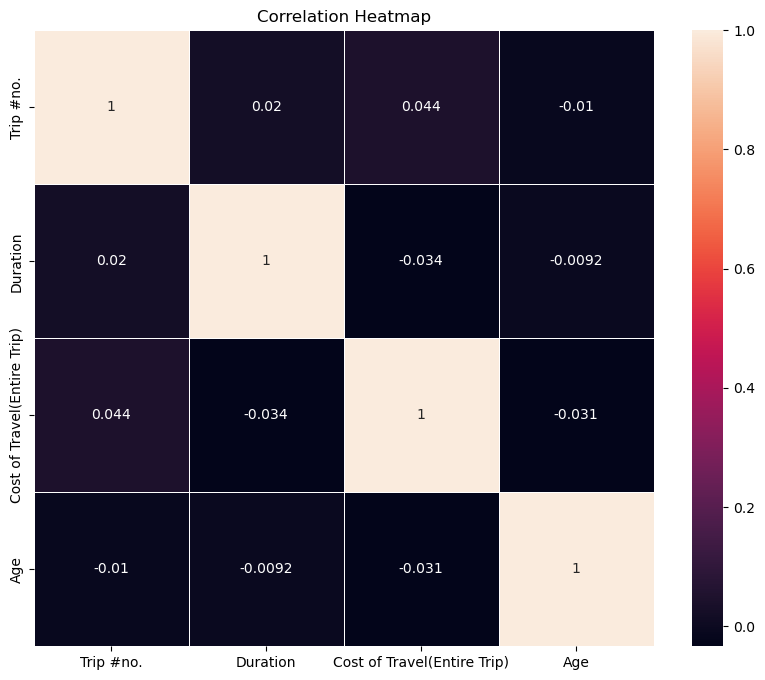

In [29]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64']]
correlation_matrix = df[numerical_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap analysis reveals the following key insights:

Weak Correlations:

There are generally weak correlations among the variables Trip Number, Duration, Cost of Travel (Entire Trip), and Age. None of the variables strongly influence each other, suggesting that other factors not included in this dataset might play a more significant role in determining trip characteristics.

Trip Characteristics:

Duration vs. Cost of Travel: A very weak negative correlation (-0.034) indicates that longer trip durations do not necessarily result in higher travel costs. Travelers may choose budget options regardless of trip length, or shorter trips might involve higher costs due to luxury preferences.

Duration vs. Age: The weak correlation (-0.0092) suggests that trip duration does not significantly vary with the age of the traveler.

Age Influence:

Age vs. Other Variables: Weak negative correlations between Age and other variables imply that travel behavior and expenses are relatively independent of the traveler’s age. This suggests that travelers of different ages exhibit similar spending and trip duration patterns.

Strategic Recommendations:

Broader Data Consideration:

Incorporate additional variables such as seasonality, travel purpose, income levels, or group size to gain a deeper understanding of travel behaviors, as these might reveal more substantial correlations and insights.

Targeted Marketing:

Given the weak influence of age on travel costs and durations, focus marketing strategies on other differentiators such as travel preferences, past travel behavior, or geographical origins of tourists.

Customized Offerings:

Develop travel packages and promotions that cater to diverse preferences rather than age-specific groups, since age appears to be a less significant factor in influencing travel behaviors.
These insights suggest a need for a more nuanced approach to understanding and targeting traveler behaviors and preferences, highlighting the importance of considering a broader range of factors in future analyses.